## Topic Modeling & Sentiment Analysis Part I

First pass "quick-and-dirty" version of topic modeling and sentiment analysis.
Primarily as a means of EDA, this was useful to get a better understanding of the types of preprocessing that are going to be necessary.


## Topic Modeling

Quick topic modeling, to see whether anything interesting pops out.
Quick and dirty as a first pass, reference [AWS](https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html) and [DataCamp](https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python). 
(Interestingly there's some verbatim code copying across these two articles. Someone stole someone
elses' code and didn't cite them! tut!)

TODO: add evaluation of coherence and test different numbers of topics.

In [3]:
import pandas as pd
import numpy as np
import os
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from textblob import TextBlob
import matplotlib as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

In [4]:
# Select local path vs kaggle kernel
path = os.getcwd()
if 'data-projects/kaggle_quora/notebooks' in path:
    data_dir = '../data/raw/'
else:
    data_dir = ''

dat = pd.read_csv(data_dir +'train.csv')

In [5]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = get_stop_words('en')
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    
    # list for tokenized documents
    texts = []

    # loop through document list
    for question in doc_set:

        # clean and tokenize document string
        raw = question.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]

        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

        # add tokens to list
        texts.append(stemmed_tokens)
        
    return texts

def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(doc_clean)

    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in doc_clean]
    
    return dictionary, corpus

In [6]:
%timeit

# preprocess questions
doc_clean = preprocess_data(list(dat.question_text.values))
dat['question_text_processed'] = doc_clean

# Create corpus and dictionary
dictionary, corpus = prepare_corpus(doc_clean)

In [7]:
print(dictionary)
# Dictionary(153239 unique tokens: ['1960', 'nation', 'nationalist', 'provinc', 'quebec']...)

Dictionary(153239 unique tokens: ['1960', 'nation', 'nationalist', 'provinc', 'quebec']...)


I started with an LDA (Latent Dirichlet Allocation) model, as it is thought to generalize to new documents better than the simpler Latent Semantic Analysis ([more details here](https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05)). But it is much slower to fit, and of course I have no interest in generalizing to new documents! 

However, the results revealed some interesting gotchas in the preprocessing that are worth exploring before moving forward.

In [8]:
# %timeit

# # generate LDA model
# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)
# ldamodel.save('lda.model')

# print(ldamodel.print_topics(num_topics=10, num_words=20))

[(0, '0.034*"s" + 0.013*"war" + 0.013*"class" + 0.012*"book" + 0.012*"read" + 0.010*"major" + 0.010*"black" + 0.010*"man" + 0.009*"c" + 0.008*"forc" + 0.008*"movi" + 0.007*"becom" + 0.007*"averag" + 0.007*"u" + 0.007*"tv" + 0.006*"known" + 0.006*"subject" + 0.006*"star" + 0.006*"process" + 0.005*"boy"'), (1, '0.016*"state" + 0.015*"student" + 0.013*"will" + 0.013*"s" + 0.013*"indian" + 0.012*"import" + 0.011*"system" + 0.010*"scienc" + 0.010*"govern" + 0.010*"manag" + 0.010*"india" + 0.009*"china" + 0.009*"human" + 0.009*"happen" + 0.008*"thing" + 0.008*"eat" + 0.008*"polit" + 0.008*"term" + 0.008*"histori" + 0.008*"form"'), (2, '0.038*"use" + 0.035*"best" + 0.033*"can" + 0.020*"way" + 0.018*"learn" + 0.018*"work" + 0.015*"compani" + 0.013*"start" + 0.011*"develop" + 0.011*"busi" + 0.010*"good" + 0.009*"market" + 0.009*"languag" + 0.009*"creat" + 0.008*"program" + 0.008*"product" + 0.008*"free" + 0.008*"make" + 0.008*"s" + 0.007*"onlin"'), (3, '0.022*"engin" + 0.019*"trump" + 0.014*"mean" + 0.011*"prepar" + 0.011*"studi" + 0.011*"univers" + 0.011*"best" + 0.011*"cours" + 0.010*"social" + 0.009*"complet" + 0.009*"exam" + 0.008*"can" + 0.008*"relat" + 0.008*"good" + 0.007*"gener" + 0.007*"s" + 0.007*"data" + 0.007*"math" + 0.007*"jee" + 0.007*"media"'), (4, '0.040*"can" + 0.015*"1" + 0.015*"use" + 0.013*"buy" + 0.012*"best" + 0.011*"number" + 0.011*"account" + 0.010*"servic" + 0.009*"get" + 0.009*"test" + 0.009*"car" + 0.008*"bank" + 0.008*"hous" + 0.008*"cost" + 0.007*"food" + 0.007*"build" + 0.007*"offic" + 0.006*"watch" + 0.006*"much" + 0.006*"song"'), (5, '0.026*"countri" + 0.018*"live" + 0.017*"american" + 0.015*"peopl" + 0.014*"india" + 0.012*"like" + 0.011*"world" + 0.010*"differ" + 0.010*"us" + 0.010*"consid" + 0.009*"s" + 0.009*"america" + 0.008*"usa" + 0.008*"chines" + 0.008*"muslim" + 0.007*"big" + 0.007*"mani" + 0.007*"citi" + 0.007*"uk" + 0.007*"non"'), (6, '0.031*"can" + 0.016*"quora" + 0.014*"question" + 0.014*"get" + 0.013*"ever" + 0.012*"t" + 0.012*"s" + 0.010*"name" + 0.010*"ask" + 0.009*"answer" + 0.009*"anyon" + 0.007*"peopl" + 0.007*"help" + 0.007*"ve" + 0.007*"will" + 0.007*"stop" + 0.007*"right" + 0.006*"problem" + 0.006*"one" + 0.006*"made"'), (7, '0.034*"get" + 0.034*"can" + 0.022*"job" + 0.019*"take" + 0.017*"time" + 0.014*"school" + 0.011*"day" + 0.011*"long" + 0.011*"colleg" + 0.011*"go" + 0.011*"caus" + 0.011*"place" + 0.010*"work" + 0.010*"experi" + 0.009*"best" + 0.008*"will" + 0.008*"one" + 0.008*"4" + 0.007*"high" + 0.007*"famili"'), (8, '0.035*"like" + 0.034*"t" + 0.028*"peopl" + 0.017*"feel" + 0.016*"can" + 0.016*"s" + 0.015*"know" + 0.015*"don" + 0.014*"life" + 0.014*"think" + 0.013*"say" + 0.013*"girl" + 0.012*"person" + 0.012*"want" + 0.011*"love" + 0.011*"someon" + 0.010*"look" + 0.010*"women" + 0.009*"just" + 0.009*"friend"'), (9, '0.032*"year" + 0.027*"can" + 0.019*"get" + 0.015*"2" + 0.015*"will" + 0.013*"money" + 0.012*"old" + 0.011*"3" + 0.010*"much" + 0.010*"interest" + 0.010*"2017" + 0.009*"5" + 0.009*"talk" + 0.009*"10" + 0.008*"date" + 0.008*"age" + 0.008*"first" + 0.008*"game" + 0.008*"make" + 0.008*"month"')]

In [9]:
# corpus_topics = ldamodel.get_document_topics(corpus, per_word_topics=False)
# doc_topics = [doc_topics for doc_topics in corpus_topics]

# q_i = 10
# print(corpus_topics[q_i])
# print(max(corpus_topics[q_i], key=lambda x: x[1]))
# print(dat.question_text[q_i])

(8, 0.52495134)
What can you say about feminism?

Here is topic 8 with 30 words:
(8, '0.035*"like" + 0.034*"t" + 0.028*"peopl" + 0.017*"feel" + 0.016*"can" + 0.016*"s" + 0.015*"know" + 0.015*"don" + 0.014*"life" + 0.014*"think" + 0.013*"say" + 0.013*"girl" + 0.012*"person" + 0.012*"want" + 0.011*"love" + 0.011*"someon" + 0.010*"look" + 0.010*"women" + 0.009*"just" + 0.009*"friend" + 0.008*"make" + 0.008*"one" + 0.008*"guy" + 0.008*"men" + 0.008*"realli" + 0.007*"sex" + 0.007*"see" + 0.007*"tell" + 0.006*"call" + 0.006*"m"')

### First Model Topics

Just to handwave about what these topics might represent:
0. Studies (class, book, read, major)
1. ?
2. Work / starting a business (learn, work, company, start, business, market)
3. Trump + more studies (trump, prepare, exam, university)
4. ?
5. USA vs Other Countries (country, live, america, people, india, china, world, differ)
6. Quora quesions (quora, question, ask, answer)
7. Getting a job (get, job, time, school, experience)
8. Relationship advice (like, feel, love, sex, tell, look, friend)
9. Financial advice (year, money, interest, make, month)

Which certainly seems like a valid assortment of topics on Quora! And I suspect whether some topics, such as financial advice, are less likely to 

Though I'm a little surprised that a clearer US politics cluster didn't turn up.

### Need Better Preprocessing!

The topics are plausible, but it's clear to me that the sloppy pre-processing didn't help.

#### Review Stemming

Notice that lots of single letters turn up "s" and "t". Presumably from contractions that were split into tokens. These are not meaningful.

The letters "u" and "c" also show up. Unclear whether this is due to stemming gone wrong or SMS slang ("c u l8r").

In [10]:
dat[dat['question_text_processed'].apply(lambda x: 'c' in x)].sample(10)

,qid,question_text,target,question_text_processed
602357,75f9eaffb439dca1788f,Is Emergen-C a suitable substitute for a daily multivitamin if substituted once or twice a week?,0,"[emergen, c, suitabl, substitut, daili, multivitamin, substitut, twice, week]"
291828,3927f44041fbb2d695d2,How did Christianity start in 4 B.C.?,0,"[christian, start, 4, b, c]"
584428,727f5b5dba711f1c63e0,Would it be mean to think of the GOP members of Congress as 'D.C. Trash'?,1,"[mean, think, gop, member, congress, d, c, trash]"
969009,bddae3be7d5feab82f46,Why temperature stop increasing on 0°c for some time and then eventually increase after some time?,0,"[temperatur, stop, increas, 0, c, time, eventu, increas, time]"
116620,16d0e964467f81d7c3cb,How do I create a kW to BHP simple calculator using C++?,0,"[creat, kw, bhp, simpl, calcul, use, c]"
1083480,d4533a689ec2fc721a6d,What kind of knowledge should a mechanical engineer has to understand CDAC course neatly? As I have just basic knowledge of C++ what else should I start learning about before going for CDAC?,0,"[kind, knowledg, mechan, engin, understand, cdac, cours, neatli, just, basic, knowledg, c, els, start, learn, go, cdac]"
43010,086ac4126d5b3447ad0b,"If I take English, French and I.C.T, will I be able to appear for the IAS examination?",0,"[take, english, french, c, t, will, abl, appear, ia, examin]"
466441,5b573e23b01e04ca7147,What does a C programmer know that a C++ programmer doesn't?,0,"[c, programm, know, c, programm, doesn, t]"
59831,0bbd18f708628bc293d0,How many times did you got posted in type C countries?,0,"[mani, time, got, post, type, c, countri]"
955518,bb396246c003142d6882,What's the best or most useful thing I can do with C++?,0,"[s, best, use, thing, can, c]"


OMG mostly references to **C the programming language**!

Other uses:
* washington DC.
* light constant c
* educational acronyms 
* temperature
* musical notes
* chartered accountant
* math questions

In [11]:
dat['c'] = dat['question_text_processed'].apply(lambda x: 'c' in x)
dat[['target', 'c']].groupby('c').agg(['mean', 'count'])

target         
           mean    count
c                       
False  0.062002  1302410
True   0.015625  3712

In [12]:
dat['c_plus_plus'] = dat['question_text'].apply(lambda x: 'c++' in x.lower())
dat[['target', 'c_plus_plus']].groupby('c_plus_plus').agg(['mean', 'count'])

target         
                 mean    count
c_plus_plus                   
False        0.061909  1305236
True         0.004515  886

In [13]:
dat[np.logical_and(dat.c_plus_plus, dat.target==1)]

,qid,question_text,target,question_text_processed,c,c_plus_plus
64148,0c9448676d165ef38c0a,"I'm 12 and I know the ins and outs of C++, am I special?",1,"[m, 12, know, in, out, c, special]",True,True
275723,35f7029ca719af9394b8,Why do Indian programmers (99%) don't know that in C/C++ programming void main() is invalid? Why don't they refer to the standard documentation?,1,"[indian, programm, 99, don, t, know, c, c, program, void, main, invalid, don, t, refer, standard, document]",True,True
456290,59616452a95fadd3aacb,"If C++, the programming language, was developed by a man, why is it difficult to learn?",1,"[c, program, languag, develop, man, difficult, learn]",True,True
872811,ab017303d09f026d62f0,Does it make me a racist if I don't want to write code in C++?,1,"[make, racist, don, t, want, write, code, c]",True,True


In [14]:
dat['java'] = dat['question_text'].apply(lambda x: 'java ' in x.lower())
dat[['target', 'java']].groupby('java').agg(['mean', 'count'])

target         
           mean    count
java                    
False  0.061930  1304828
True   0.001546  1294

In [15]:
dat[np.logical_and(dat.java, dat.target==1)]

,qid,question_text,target,question_text_processed,c,c_plus_plus,java
225452,2c17901de2f050beb2f8,"Is Java for ""idiots""?",1,"[java, idiot]",False,False,True
1165296,e458bf77e7ad154abfd3,I'm 12 years old and I can code in Java and Swift. Should I skip classes that I'm not interested in so that I can work on my projects instead?,1,"[m, 12, year, old, can, code, java, swift, skip, class, m, interest, can, work, project, instead]",False,False,True


In [16]:
dat['python'] = dat['question_text'].apply(lambda x: 'python' in x.lower())
dat[['target', 'python']].groupby('python').agg(['mean', 'count'])

target         
            mean    count
python                   
False   0.061924  1304932
True    0.003361  1190

In [17]:
# Python is a language for beginners huh? Yeah, this kid is punk
dat[np.logical_and(dat.python, dat.target==1)]

,qid,question_text,target,question_text_processed,c,c_plus_plus,java,python
93459,124bab56b09739615704,"I am an experienced programmer and in my high school my teacher tried to make me use python so I said, ""No; Trust me, python is just a language for beginners, thereby making it not for me."" I got sent out. Did I do anything wrong?",1,"[experienc, programm, high, school, teacher, tri, make, use, python, said, trust, python, just, languag, beginn, therebi, make, got, sent, anyth, wrong]",False,False,False,True
580604,71c2b76c9eac6519fdd1,"Does nobody think Monty Python is way less funny than Benny Hill, and that Python fans should be sent to death camps immediately?",1,"[nobodi, think, monti, python, way, less, funni, benni, hill, python, fan, sent, death, camp, immedi]",False,False,False,True
695890,884aebdbce2abfc4e94d,I have a toddler. How should she prepare herself for the job market 15 years from now in the world of AI? Should I teach her Python as soon as she is willing to learn?,1,"[toddler, prepar, job, market, 15, year, now, world, ai, teach, python, soon, will, learn]",False,False,False,True
1169922,e543c94d470d873d611e,How do I eat a Python without anyone noticing?,1,"[eat, python, without, anyon, notic]",False,False,False,True


Anyhoo, programming language related questions are low-frequency insincere.

In [18]:
dat[dat['question_text_processed'].apply(lambda x: 'd' in x)].sample(10)

,qid,question_text,target,question_text_processed,c,c_plus_plus,java,python
664948,8237e5bfd44e868ca560,What would've happened if Taiwan'd declared independence from China at 1975?,0,"[ve, happen, taiwan, d, declar, independ, china, 1975]",False,False,False,False
739571,90d996d0f0cb85b1357f,"If you were about to hire someone to work at your company, what would be the first thing you’d read on their resume?",0,"[hire, someon, work, compani, first, thing, d, read, resum]",False,False,False,False
1152583,e1d7992f1ec988bf705a,"If Ned Stark had died when the Starks were young kids, who'd rule over Winterfell? What'd have happened to Jon Snow?",0,"[ned, stark, die, stark, young, kid, d, rule, winterfel, d, happen, jon, snow]",False,False,False,False
314446,3d9e00a015c321ef4033,"Is it safe to travel by train from Washington, D.C. to Atlantic City, New Jersey?",0,"[safe, travel, train, washington, d, c, atlant, citi, new, jersey]",True,False,False,False
48388,097b847bec42d26030db,"There are some flaws (low GPA, no first-author publications) in my application materials for a Ph.D. program. Should I explain to the admission committee?",0,"[flaw, low, gpa, first, author, public, applic, materi, ph, d, program, explain, admiss, committe]",False,False,False,False
605053,767c6de68ed10a9e1ef2,"What is the deal with gossipers? I don't mean to sound like a 1990's comic but seriously, are they unaware that if they focused as much on themselves as they do others they'd actually be happy?",1,"[deal, gossip, don, t, mean, sound, like, 1990, s, comic, serious, unawar, focus, much, other, d, actual, happi]",False,False,False,False
72196,0e273393c803f3c7e1c8,Is there a 3-D printer that has a nozzle that moves from the tension of ropes?,0,"[3, d, printer, nozzl, move, tension, rope]",False,False,False,False
354945,4590a6afb6e7697d854d,I'd like to know if T-bill future is still being traded now or it's already been phased out?,0,"[d, like, know, t, bill, futur, still, trade, now, s, alreadi, phase]",False,False,False,False
992346,c27406615aeddc625ee2,"Through the history, accounting for inflation, has the cost of R&D in Formula 1 gone up, down or nowhere?",0,"[histori, account, inflat, cost, r, d, formula, 1, gone, nowher]",False,False,False,False
1082595,d42751cc26d83bf14aac,Do you think you'd be a good president?,0,"[think, d, good, presid]",False,False,False,False


Notes:
    * he'd -> he would; I'd -> I would; Why'd -> why would; you'd -> you would
    * D' are mostly names
    * Ph.D -> Doctor of Philosophy
    * D.C -> Washington DC

In [19]:
dat[dat['question_text_processed'].apply(lambda x: 'u' in x)].sample(10)

,qid,question_text,target,question_text_processed,c,c_plus_plus,java,python
1067512,d12de64457cd271c4769,"What do you think are the most famous quotes from every U.S. President (not best, most famous)?",0,"[think, famou, quot, everi, u, s, presid, best, famou]",False,False,False,False
762516,956391a355d59765fc1f,How Donald Trump is hurting U.S economy both domestically and internationally? Give me at least 2 examples.,0,"[donald, trump, hurt, u, s, economi, domest, intern, give, least, 2, exampl]",False,False,False,False
866872,a9d97819631bcaa37e78,Are there any other European countries that suffers as much as the U.K. does with lack of housing?,0,"[european, countri, suffer, much, u, k, lack, hous]",False,False,False,False
402527,4edf3b7bc059c16a4eb3,"If anyone has filled a false case u/s 323 & 341/34 against me, what to do?",0,"[anyon, fill, fals, case, u, s, 323, 341, 34]",False,False,False,False
1271808,f93d852cb079a4119df4,How long should I wait to move on to Shippuden? I don't want the leaf/sand characters to change; u;,0,"[long, wait, move, shippuden, don, t, want, leaf, sand, charact, chang, u]",False,False,False,False
1152923,e1e808642c7e6df07515,How is life in the U.S. for students?,0,"[life, u, s, student]",False,False,False,False
81192,0fe6ed0b26847598357e,"If there is a built-in spending and inflation that occurs when taxpayers subsidize things like education, which is part of the reason why U.S. education costs are so high, why don’t we see just as high prices for education in Western Europe?",0,"[built, spend, inflat, occur, taxpay, subsid, thing, like, educ, part, reason, u, s, educ, cost, high, don, t, see, just, high, price, educ, western, europ]",False,False,False,False
950407,ba3c5dfa270bd9e60a7e,How is it useful to speak French in the U.S?,0,"[use, speak, french, u, s]",False,False,False,False
1127976,dd0bfc06608872844adb,Were African American slaves asked if they wanted to remain in the U.S. after being freed? Was a ship-ride home even offered?,0,"[african, american, slave, ask, want, remain, u, s, freed, ship, ride, home, even, offer]",False,False,False,False
1113584,da33f2f24d7c595db500,Is it worth delivering baby in U.S. when someone is planning to move back and settle in India?,0,"[worth, deliv, babi, u, s, someon, plan, move, back, settl, india]",False,False,False,False


* U.S or U.S. -> United States of America or USA (check embedding vocabulary)
* U -> You

In [20]:
dat[dat['question_text_processed'].apply(lambda x: 'r' in x)].sample(10)

,qid,question_text,target,question_text_processed,c,c_plus_plus,java,python
179311,230ad0b4dbce5976de54,How do you find the length of the curve r=3θ^2 from θ=0 to θ=π?,0,"[find, length, curv, r, 3θ, 2, θ, 0, θ, π]",False,False,False,False
48441,097e1c9ca3fd6148cc4b,How do we know the stability of compounds with respect to +R or -R groups?,0,"[know, stabil, compound, respect, r, r, group]",False,False,False,False
104480,147663f5c075e1613024,Where was H.R. Pufnstuf the introduction filmed?,0,"[h, r, pufnstuf, introduct, film]",False,False,False,False
624504,7a4ac5a3582257d35179,How can you identify those constants {Example-(R) universal Gas constant} are physical quantity in physics?,0,"[can, identifi, constant, exampl, r, univers, ga, constant, physic, quantiti, physic]",False,False,False,False
691678,8777f6ece5e2d936cfd3,"Is there a sectional cutoff for IIT-D, IIT-R for MBA? If yes, then what was the previous year cutoff?",0,"[section, cutoff, iit, d, iit, r, mba, ye, previou, year, cutoff]",False,False,False,False
274,000d0c95bccf3b3b51fb,"What are + R,-R,+I,-I groups in organic chemistry?",0,"[r, r, group, organ, chemistri]",False,False,False,False
315537,3dd62fe2b26367c1a6d5,What is r o water?,0,"[r, o, water]",False,False,False,False
590716,73b6806cc86403472fc3,"J.R.R. Tolkein single-handedly created our modern conception of staple fantasy races such as Elves, Dwarves, and Orcs. Are his versions based on earlier legends, or did he invent them wholesale?",0,"[j, r, r, tolkein, singl, handedli, creat, modern, concept, stapl, fantasi, race, elv, dwarv, orc, version, base, earlier, legend, invent, wholesal]",False,False,False,False
252735,317586bff51c65cd48c5,What can I do if I want to be successful in medicinal chemistry in R&D?,0,"[can, want, success, medicin, chemistri, r, d]",False,False,False,False
536898,692975ee87d5359853e9,Which r d competitive exams can attend after diploma in EC?,0,"[r, d, competit, exam, can, attend, diploma, ec]",False,False,False,False


#### Review Stop Words

In [21]:
' '.join(get_stop_words('en'))

"a about above after again against all am an and any are aren't as at be because been before being below between both but by can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once only or other ought our ours ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves"

Some important notes about this stopword set.
1. Why and are lead questions were far more likely to be insincere than how, what, where and which leading questions. Using these as stop-words might be fine for topic modeling, but isn't a good idea for, say, IFIDF/Naive-Bayes. 
2. It is unclear to me that stopping "can't" and "cannot" but not "can" is a good idea.
3. [Could, should, would](https://en.wikipedia.org/wiki/Modal_verb) are modal verbs. Examples include: She can go (ability), You may go (permission), You should go (request), and You must go (command). These might be problematic for topic modeling, but not something that should be lost for final models.

## Is sentiment or subjectivity associated with insincerity?

In [22]:
dat['sentiment'] = dat.question_text.apply(lambda x: TextBlob(x).sentiment)
dat['polarity'] = dat['sentiment'].apply(lambda x: x.polarity)
dat['subjectivity'] = dat['sentiment'].apply(lambda x: x.subjectivity)
dat.head()

,qid,question_text,target,question_text_processed,c,c_plus_plus,java,python,sentiment,polarity,subjectivity
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0,"[quebec, nationalist, see, provinc, nation, 1960]",False,False,False,False,"(0.0, 0.0)",0.0,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0,"[adopt, dog, encourag, peopl, adopt, shop]",False,False,False,False,"(0.0, 0.0)",0.0,0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0,"[veloc, affect, time, veloc, affect, space, geometri]",False,False,False,False,"(0.0, 0.0)",0.0,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0,"[otto, von, guerick, use, magdeburg, hemispher]",False,False,False,False,"(0.0, 0.0)",0.0,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0,"[can, convert, montra, helicon, d, mountain, bike, just, chang, tyre]",False,False,False,False,"(0.0, 0.0)",0.0,0.0


In [23]:
dat[['polarity', 'subjectivity', 'target']].groupby('target').mean()

,polarity,subjectivity
target,,
0,0.104876,0.270181
1,0.028165,0.360340


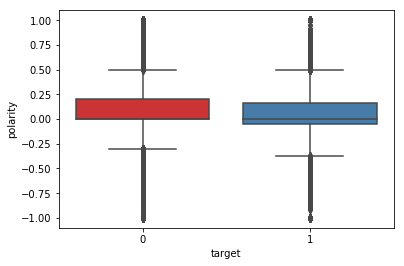

In [24]:
# Grouped boxplot
_ = sns.boxplot(x="target", y="polarity", data=dat, palette="Set1")

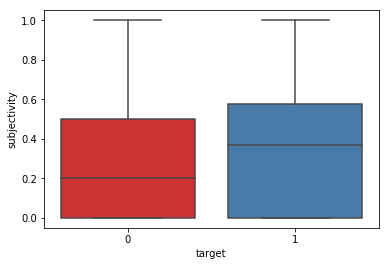

In [25]:
# Grouped boxplot
_ = sns.boxplot(x="target", y="subjectivity", data=dat, palette="Set1")

Polarity is slightly higher for the sincere questions, meaning that they are slightly more positive.
Subjectivity is slightly higher among insincere questions.
These differences aren't large, but they do follow the expected directionality.

TextBlob uses the Pattern library, which in turn uses a corpus based on movie reviews. This may not map very well to the types of language used on Quora. NLTK does include other corpus options, so those could be evaluated.

In addition doing some pre-processing on this text before may improve sentiment scoring.